In [200]:
import pandas as pd
import datetime

# import dengue incidence data
df = pd.read_excel('data/Dengue cases regional weekly 2012-2016.xlsx',
                   sheet_name='Data',
                   header=[0,1,2]
                   )
df.index = df.iloc[:,0]
df.index = df.index.rename('region')

rename = {'Unnamed: 0_level_0': 'year',
          'Unnamed: 0_level_1': 'type',
          'Unnamed: 0_level_2': 'week'
         }

df = df.rename(mapper=rename, axis=1)

df = df.transpose()
df = df[1:]
df = df.sort_index()

df.head()

region                                      I    II    III   IV-A  IV-B     V  \
2012 Cumulative total 1st wk to 27th wk  2617  2231   8863   8445   548  1458   
                      1st wk to 28th wk  3185  2505   9912   9439   605  1580   
                      1st wk to 32nd wk  5522  4062  14861  13886   953  2054   
                      1st wk to 33rd wk  6019  4463  16008  15224  1039  2150   
     Morbidity week   27                  444   198    783    861    56   149   

region                                     VI   VII VIII    IX     X    XI  \
2012 Cumulative total 1st wk to 27th wk  4094  5668  386  2618  2082  4612   
                      1st wk to 28th wk  4605  6133  415  2775  2273  4919   
                      1st wk to 32nd wk  6742  8447  560  3236  3342  6258   
                      1st wk to 33rd wk  7220  9171  623  3353  3739  6553   
     Morbidity week   27                  563   442   22   152   187   218   

region                                    XII ARMM   CAR CARAGA    NCR  \
2012 Cumulative total 1st wk to 27th wk  2234  336  1650    831  12229   
                      1st wk to 28th wk  2343  371  1945    900  13434   
                      1st wk to 32nd wk  2184  563  3234   1183  18005   
                      1st wk to 33rd wk  2871  631  3515   1281  19613   
     Morbidity week   27                  111   29   308    102   1002   

region                                    Total  NaN  NaN  
2012 Cumulative total 1st wk to 27th wk   60902  NaN  NaN  
                      1st wk to 28th wk   67339  NaN  NaN  
                      1st wk to 32nd wk   95692  NaN  NaN  
                      1st wk to 33rd wk  103473  NaN  NaN  
     Morbidity week   27                   5627  NaN  NaN

In [209]:
# keep only morbidity per week
df_morb = df.loc[(slice(None), 'Morbidity week ', slice(None)), :]
df_morb = df_morb.reset_index()
df_morb = df_morb.drop(columns=['level_1'])
df_morb.rename({'level_0': 'year', 'level_2': 'week'}, axis=1, inplace=True)
# df_morb = df_morb.drop(df_morb.columns[[19, 20, 21]], axis=1)

# remove data from 2015 (values are duplicated, see original xls file)
df_morb = df_morb[df_morb['year'] != 2015]
df_morb.head()

region,year,week,I,II,III,IV-A,IV-B,V,VI,VII,...,X,XI,XII,ARMM,CAR,CARAGA,NCR,Total,nan,nan
0,2012,27,444,198,783,861,56,149,563,442,...,187,218,111,29,308,102,1002,5627,NaN,NaN
1,2012,28,568,274,1049,994,57,122,511,465,...,191,307,109,35,295,69,1205,6437,NaN,NaN
2,2012,32,485,394,1159,1046,99,106,473,665,...,355,324,96,56,387,97,1065,6979,NaN,NaN
3,2012,33,497,401,1147,1338,86,96,478,724,...,397,295,87,68,281,98,1608,7781,NaN,NaN
4,2013,23,119,75,159,204,166,30,673,119,...,72,178,216,21,129,50,132,2558,NaN,NaN


In [210]:
# add column with date
def extract_date(x):
    d = str(x['year']) + "-W" + str(x['week'])
    r = datetime.datetime.strptime(d + '-1', "%Y-W%W-%w")
    return r

df_morb['date'] = df_morb.apply(extract_date, axis=1)
df_morb.head()

region,year,week,I,II,III,IV-A,IV-B,V,VI,VII,...,XI,XII,ARMM,CAR,CARAGA,NCR,Total,nan,nan,date
0,2012,27,444,198,783,861,56,149,563,442,...,218,111,29,308,102,1002,5627,NaN,NaN,2012-07-02
1,2012,28,568,274,1049,994,57,122,511,465,...,307,109,35,295,69,1205,6437,NaN,NaN,2012-07-09
2,2012,32,485,394,1159,1046,99,106,473,665,...,324,96,56,387,97,1065,6979,NaN,NaN,2012-08-06
3,2012,33,497,401,1147,1338,86,96,478,724,...,295,87,68,281,98,1608,7781,NaN,NaN,2012-08-13
4,2013,23,119,75,159,204,166,30,673,119,...,178,216,21,129,50,132,2558,NaN,NaN,2013-06-10


region       I  II  III IV-A IV-B   V  VI VII VIII  IX    X  XI  XII ARMM CAR  \
date                                                                            
2014-02-10  44  46  164  149   79  12  87  82  164  89   50  94  109   24  45   
2014-03-03  27  25   87  101   17  11  64  69  154  60   82  97  143   10  22   
2014-03-10  23  26   71  112   13   9  71  82  161  63  119  91  113   11  19   
2014-03-31  26  18   44   83    8   9  56  33  105  58  106  61  114    8  20   
2014-04-14  18  24   51   53   16  11  48  34   98  62  109  67   98   12  14   

region     CARAGA  NCR  
date                    
2014-02-10     89  151  
2014-03-03     68   93  
2014-03-10     74   69  
2014-03-31     85   63  
2014-04-14     93   45  


Text(26.625, 0.5, 'morbidity')

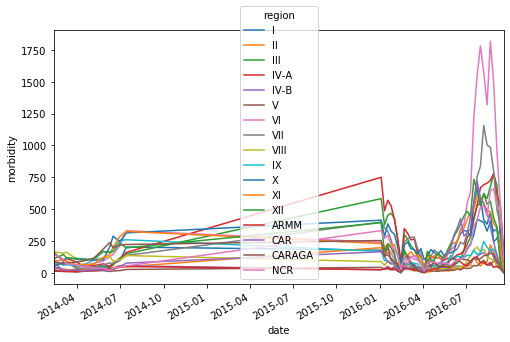

In [213]:
# plot years when we have complete data: 2014 and 2016

import seaborn as sns
import matplotlib.pyplot as plt

df_morb_year = df_morb.copy()
df_morb_year = df_morb_year[(df_morb_year['year']==2014) | (df_morb_year['year']==2016)]

df_morb_year.index = df_morb_year['date']
df_morb_year = df_morb_year.drop(df_morb_year.columns[[20, 21, 22]], axis=1)
df_morb_year = df_morb_year.drop(columns=['year', 'week', 'Total'])
print(df_morb_year.head())

df_morb_year.plot(figsize=(7,5))
plt.tight_layout()
plt.ylabel('morbidity') 

Text(26.75, 0.5, 'morbidity')

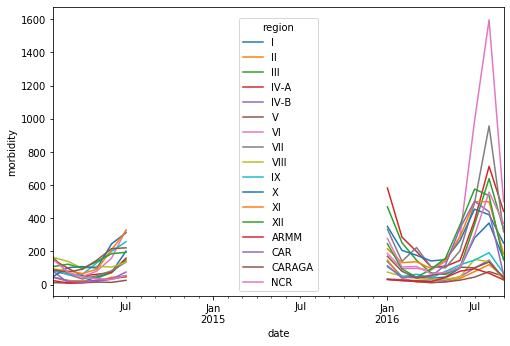

In [214]:
# resample per month
df_morb_year = df_morb_year[df_morb_year.columns].astype(float)
df_morb_month = df_morb_year.resample('M').mean()
df_morb_month = df_morb_month[df_morb_month.columns].astype(float)

df_morb_month.plot(figsize=(7,5))
plt.tight_layout()
plt.ylabel('morbidity') 

In [215]:
# LOAD OVITRAP DATA
import numpy as np

df_ovi = pd.read_csv('../ovitrap/data/ovitrap_data_month_adm1.csv')
df_ovi['date'] = pd.to_datetime(df_ovi['date'])

# select only months based on number of data points and relative error
df_ovi = df_ovi[df_ovi.count_ovi > 20]
df_ovi = df_ovi[df_ovi.error_relative_ovi < 0.25]

# pivot table: date vs region
df_ovi = df_ovi.pivot_table(values='mean_ovi', index=df_ovi.date, columns='adm_level', aggfunc=np.mean)
df_ovi = df_ovi[df_ovi.columns].astype(float)

df_ovi.head()

adm_level,ARMM,CAR,CARAGA,I,II,III,IV-A,IV-B,IX,NCR,NIR,V,VI,VII,VIII,X,XI,XII
date,,,,,,,,,,,,,,,,,,
2012-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.009171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-07-01,NaN,91.521739,NaN,NaN,52.212174,NaN,NaN,NaN,NaN,23.545386,34.797288,NaN,39.240896,48.840926,NaN,NaN,51.909900,NaN
2012-08-01,NaN,91.272727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.469794,29.904026,NaN,45.848346,NaN,NaN,NaN,43.784000,66.980519
2012-09-01,NaN,95.000000,NaN,NaN,NaN,30.035714,NaN,NaN,NaN,29.124020,30.529508,NaN,44.185271,NaN,NaN,NaN,42.131935,NaN
2012-10-01,NaN,57.371111,NaN,NaN,NaN,27.400000,NaN,NaN,NaN,28.548276,46.343243,NaN,50.378075,NaN,NaN,NaN,38.626404,NaN


Text(105.125, 0.5, 'ovitrap index')

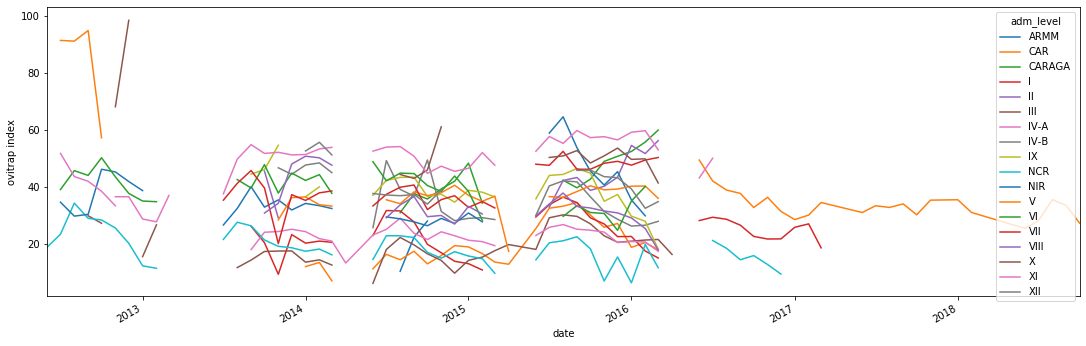

In [218]:
# plot ovi index over all years
df_ovi.plot(figsize=(15,5))
plt.tight_layout()
plt.ylabel('ovitrap index') 

Text(111.375, 0.5, 'ovitrap index')

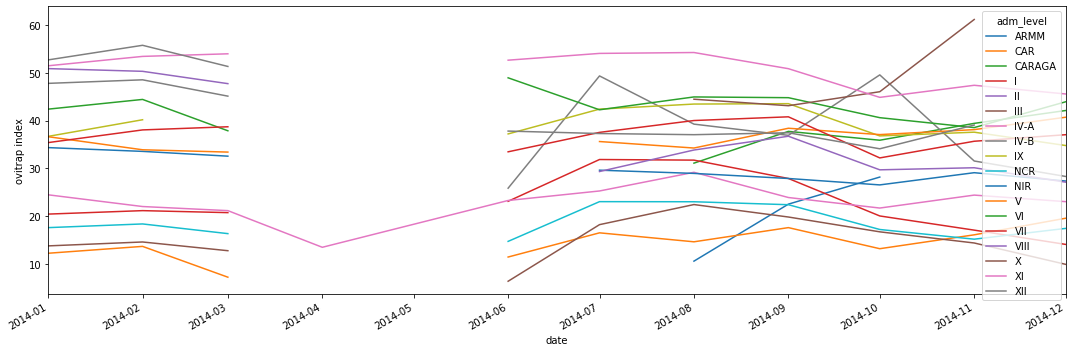

In [219]:
# plot ovi index in 2014
df_ovi_year = df_ovi[df_ovi.index.year==2014]

df_ovi_year.plot(figsize=(15,5))
plt.tight_layout()
plt.ylabel('ovitrap index') 

In [220]:
# replace date in incidence data, to have same indices with ovi
df_morb_month.index = df_morb_month.reset_index()['date'].apply(lambda x: x.replace(day=1))

# compute correlation
df_ovi_year.corrwith(df_morb_month, axis=0, method='pearson')

ARMM           NaN
CAR       0.946003
CARAGA         NaN
I         0.997375
II             NaN
III       0.730260
IV-A      0.714915
IV-B      0.347209
IX        0.261165
NCR       0.112588
V         0.996979
VI        0.156289
VII      -0.045289
VIII      0.716345
X              NaN
XI        0.072509
XII      -0.996748
NIR            NaN
dtype: float64